# **PROYEK AKHIR : MENYELESAIKAN PERMASALAHAN INSTITUSI PENDIDIKAN**

- Nama : Rhamdan Syahrul Mubarak
- Email : rhamss794@mail.ugm.ac.id
- ID Dicoding : rhamdansyahrul

## **Persiapan**

### Menyiapkan Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Menyiapkan data yang akan digunakan

In [2]:
raw_df = pd.read_csv("/content/data/data.csv", sep=";")
raw_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
maritalDict = {
    "1" : "Single",
    "2" : "Married",
    "3" : "Widower",
    "4" : "Divorced",
    "5" : "Facto Union",
    "6" : "Legally Separated"
}

courseDict = {
      "33" : "Biofuel Production Technologies",
      "171" : "Animation and Multimedia Design ",
      "8014" : "Social Service (evening attendance)",
      "9003" : "Agronomy",
      "9070" : "Communication Design",
      "9085" : "Veterinary Nursing",
      "9119" : "Informatics Engineering",
      "9130" : "Equinculture",
      "9147" : "Management",
      "9238" : "Social Service",
      "9254" : "Tourism",
      "9500" : "Nursing",
      "9556" : "Oral Hygiene",
      "9670" : "Advertising and Marketing Management",
      "9773" : "Journalism and Communication",
      "9853" : "Basic Education",
      "9991" : "Management (evening attendance)",
  }

prevQualificationDict = {
    "1"  : "Secondary education",
    "2"  : "Higher education : bachelor's degree",
    "3"  : "Higher education : degree",
    "4"  : "Higher education : master's",
    "5"  : "Higher education : doctorate",
    "6"  : "Frequency of higher education",
    "9"  : "12th year of schooling : not completed",
    "10" : "11th year of schooling : not completed",
    "12" : "Other : 11th year of schooling",
    "14" : "10th year of schooling",
    "15" : "10th year of schooling : not completed",
    "19" : "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    "38" : "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    "39" : "Technological specialization course",
    "40" : "Higher education : degree (1st cycle)",
    "42" : "Professional higher technical course",
    "43" : "Higher education : master (2nd cycle)",
}

Nacionality = {
    "1" : "Portuguese",
    "2" : "German",
    "6" : "Spanish",
    "11" : "Italian",
    "13" : "Dutch",
    "14" : "English",
    "17" : "Lithuanian",
    "21" : "Angolan",
    "22" : "Cape Verdean",
    "24" : "Guinean",
    "25" : "Mozambican",
    "26" : "Santomean",
    "32" : "Turkish",
    "41" : "Brazilian",
    "62" : "Romanian",
    "100" : "Moldova (Republic of)",
    "101" : "Mexican",
    "103" : "Ukrainian",
    "105" : "Russian",
    "108" : "Cuban",
    "109" : "Colombian"
}

job = {
    "0"   : "Student",
    "1"   : "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    "2"   : "Specialists in Intellectual and Scientific Activities",
    "3"   : "Intermediate Level Technicians and Professions",
    "4"   : "Administrative staff",
    "5"   : "Personal Services, Security and Safety Workers and Sellers",
    "6"   : "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    "7"   : "Skilled Workers in Industry, Construction and Craftsmen",
    "8"   : "Installation and Machine Operators and Assembly Workers",
    "9"   : "Unskilled Workers",
    "10"  : "Armed Forces Professions",
    "90"  : "Other Situation",
    "99"  : "",
    "101" : "Armed Forces Officers",
    "102" : "Armed Forces Sergeants",
    "103" : "Other Armed Forces personnel",
    "112" : "Directors of administrative and commercial services",
    "114" : "Hotel, catering, trade and other services directors",
    "121" : "Specialists in the physical sciences, mathematics, engineering and related techniques",
    "122" : "Health professionals",
    "123" : "teachers",
    "124" : "Specialists in finance, accounting, administrative organization, public and commercial relations",
    "125" : "Specialists in information and communication technologies (IT)",
    "131" : "Intermediate level science and engineering technicians and professions",
    "132" : "Technicians and professionals, of intermediate level of health",
    "134" : "Intermediate level technicians from legal, social, sports, cultural and similar services",
    "135" : "Information and communication technology technicians",
    "141" : "Office workers, secretaries in general and data processing operators",
    "143" : "Data, accounting, statistical, financial services and registry-related operators",
    "144" : "Other administrative support staff",
    "151" : "personal service workers",
    "152" : "sellers",
    "154" : "Protection and security services personnel",
    "161" : "Market-oriented farmers and skilled agricultural and animal production workers",
    "163" : "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    "153" : "Personal care workers and the like",
    "171" : "Skilled construction workers and the like, except electricians",
    "172" : "Skilled workers in metallurgy, metalworking and similar",
    "173" : "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    "174" : "Skilled workers in electricity and electronics",
    "181" : "Fixed plant and machine operators",
    "182" : "assembly workers",
    "183" : "Vehicle drivers and mobile equipment operators",
    "175" : "Workers in food processing, woodworking, clothing and other industries and crafts",
    "191" : "cleaning workers",
    "192" : "Unskilled workers in agriculture, animal production, fisheries and forestry",
    "193" : "Unskilled workers in extractive industry, construction, manufacturing and transport",
    "194" : "Meal preparation assistants",
    "195" : "Street vendors (except food) and street service providers"
}

attendaceDict = {"1" : "Daytime", "0" : "Evening"}
maleFemaleDict = {"1" : "Male", "0" : "Female"}
yesNoDict = {"1" : "Yes", "0" : "No"}

In [4]:
dictClass = {
    "Marital_status" : maritalDict,
    "Course" : courseDict,
    "Previous_qualification" : prevQualificationDict,
    "Nacionality" : Nacionality,
    "occupation" : job,
    "Daytime_evening_attendance" : attendaceDict,
    "Gender" : maleFemaleDict,
    "yes_no" : yesNoDict
}

def classNameObject(x, key, dictClass):
  dictUsed = dictClass[key]
  return dictUsed[str(x)]

listCategorical = [
    "Marital_status", "Course", "Previous_qualification", "Nacionality",
    "Mothers_occupation", "Fathers_occupation", "Daytime_evening_attendance", "Gender", "Displaced",
    "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Scholarship_holder", "International"
]

for col in listCategorical:
  try :
    key = [x for x in dictClass.keys() if x in col][0]
  except :
    key = "yes_no"

  raw_df[col+"_cat"] = raw_df[col].apply(lambda x : classNameObject(x, key, dictClass))

categorical_df = raw_df[[x + "_cat" for x in listCategorical] + ["Status"]].rename(columns={x + "_cat" : x for x in listCategorical})
categorical_df.head()

,Marital_status,Course,Previous_qualification,Nacionality,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Gender,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Scholarship_holder,International,Status
0,Single,Animation and Multimedia Design,Secondary education,Portuguese,"Personal Services, Security and Safety Workers...",Unskilled Workers,Daytime,Male,Yes,No,No,Yes,No,No,Dropout
1,Single,Tourism,Secondary education,Portuguese,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,Daytime,Male,Yes,No,No,No,No,No,Graduate
2,Single,Communication Design,Secondary education,Portuguese,Unskilled Workers,Unskilled Workers,Daytime,Male,Yes,No,No,No,No,No,Dropout
3,Single,Journalism and Communication,Secondary education,Portuguese,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,Daytime,Female,Yes,No,No,Yes,No,No,Graduate
4,Married,Social Service (evening attendance),Secondary education,Portuguese,Unskilled Workers,Unskilled Workers,Evening,Female,No,No,No,Yes,No,No,Graduate


## **Data Understanding**

In [5]:
# Mengetahui informasi mengenai dataset yang digunakan
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

- jumlah baris di dataset : 4424
- Seluruh field tidak memiliki null-values
- terdapat 36 field pada dataset ini dengan seluruhnya mempunyai format data number (integer & float) kecuali untuk Status adalah object

In [6]:
# Mengetahui jumlah mahasiswa yang graduated, Drop Out, dan masih berkuliah
raw_df["Status"].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [7]:
status_dict = raw_df["Status"].value_counts().to_dict()
percent_att = round( (status_dict["Dropout"] / (status_dict["Enrolled"] + status_dict["Graduate"])) * 100, 2 )
print("Persentase Mahasiswa yang Drop Out : " + str(percent_att) + "%")

Persentase Mahasiswa yang Drop Out : 47.32%


- Secara total, jumlah mahasiswa yang lulus dari universitas memiliki angka yang terbanyak di banding status lainnya
- Namun, jumlah mahasiswa yang Dropout dari Universitas ini juga relatif besar hingga hampir mencapai 50% dari mahasiswa yang terdaftar

In [8]:
numeric_columns = ["Admission_grade", "Age_at_enrollment", "Application_order"] + [x for x in raw_df.select_dtypes(include=['number']).columns.tolist() if "Curricular" in x]

raw_df[numeric_columns].describe()

,Admission_grade,Age_at_enrollment,Application_order,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,126.978119,23.265145,1.727848,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,14.482001,7.587816,1.313793,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.900000,19.000000,1.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,126.100000,20.000000,1.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,134.800000,25.000000,2.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,190.000000,70.000000,9.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


**Profil Mahasiswa Baru (Admission Grade dan Usia)**
- Nilai rata-rata penerimaan mahasiswa adalah 126.98, dengan nilai minimum 95 dan maksimum 190. Ini menunjukkan adanya variasi yang signifikan dalam tingkat kompetensi awal mahasiswa.
- Rata-rata usia mahasiswa saat pendaftaran adalah 23.27 tahun, dengan rentang usia dari 17 hingga 70 tahun. Hal ini mengindikasikan bahwa terdapat mahasiswa yang mungkin mengikuti pendidikan lebih lambat.
- Rata-rata mahasiswa menjadikan kampus ini menjadi pilihan pertama atau kedua pada saat mendaftar kuliah

**Kinerja akademik Semester 1**
- Nilai rata-rata di semester pertama adalah 10.64, dengan nilai maksimum mencapai 18.875.

**Kinerja akademik Semester 2**
- Nilai rata-rata semester kedua adalah 10.23, sedikit lebih rendah dibandingkan semester pertama (10.64).

**Perbandingan kinerja akademik Semester 1 dan 2**
- Rata-rata jumlah mata kuliah yang diambil di semester kedua berkurang dari 6.27 ke 6.23.
- Nilai rata-rata juga turun dari 10.64 ke 10.23.

### **Exploratory Data Analysis (EDA)**

In [9]:
list_cat_columns = categorical_df.columns.tolist()
list_cat_columns

['Marital_status',
 'Course',
 'Previous_qualification',
 'Nacionality',
 'Mothers_occupation',
 'Fathers_occupation',
 'Daytime_evening_attendance',
 'Gender',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Scholarship_holder',
 'International',
 'Status']

#### **Bar Chart (Distribution**)

##### **Nationality**

In [10]:
print("Total Mahasiswa Portuguese : " + str(categorical_df["Nacionality"].value_counts()["Portuguese"]))
categorical_df[categorical_df["Nacionality"] == "Portuguese"]["Status"].value_counts()

Total Mahasiswa Portuguese : 4314


,count
Status,
Graduate,2155
Dropout,1389
Enrolled,770


 Sebanyak 1389 mahasiswa (sekitar 32%) keluar dari program studi, menunjukkan bahwa hampir sepertiga mahasiswa tidak menyelesaikan pendidikan mereka. Ini mungkin terkait dengan faktor eksternal seperti beban biaya, kualitas akademik, atau komitmen pribadi.

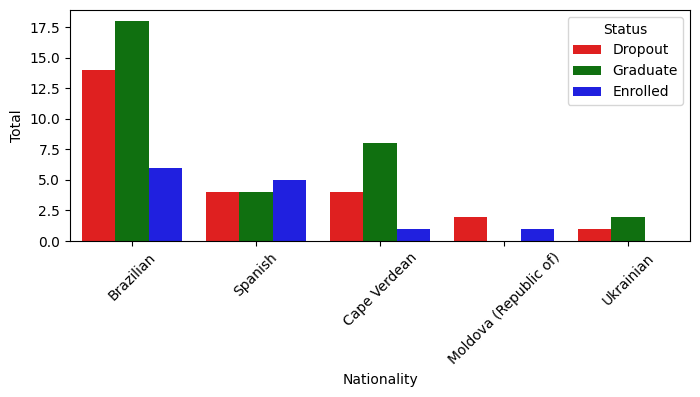

In [11]:
top_5_nacionality = categorical_df[categorical_df["Status"] == "Dropout"]["Nacionality"].value_counts().sort_values(ascending=False).head(6)
top_nacionality_list = top_5_nacionality.index.tolist()
top_nacionality_list.remove("Portuguese")
top_5_nacionality_df = categorical_df[categorical_df["Nacionality"].isin(top_nacionality_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Nacionality', hue='Status', data=top_5_nacionality_df, order=top_nacionality_list, palette=color_dict)
plt.title('')
plt.xlabel('Nationality')
plt.ylabel('Total')
plt.xticks(rotation=45)

plt.show()

- Brazil menjadi negara dengan jumlah mahasiswa internasional terbesar di kampus ini. Namun, angka dropout juga cukup tinggi, yaitu sebanyak 13 mahasiswa, sementara jumlah mahasiswa yang berhasil lulus adalah 18 orang. menunjukkan tantangan dalam mempertahankan mahasiswa Brazil.

- Negara Spanish dan Cape Verdean memiliki jumlah mahasiswa dropout yang sama, yakni 4 orang, menandakan pola yang serupa dalam tingkat ketidaklanjutan studi.

- Di antara mahasiswa dari negara Spanish, jumlah yang lulus dan dropout menunjukkan angka yang seimbang, masing-masing sebanyak 4 orang, mencerminkan potensi ketidakpastian dalam pencapaian akademik mereka.

##### **Course**

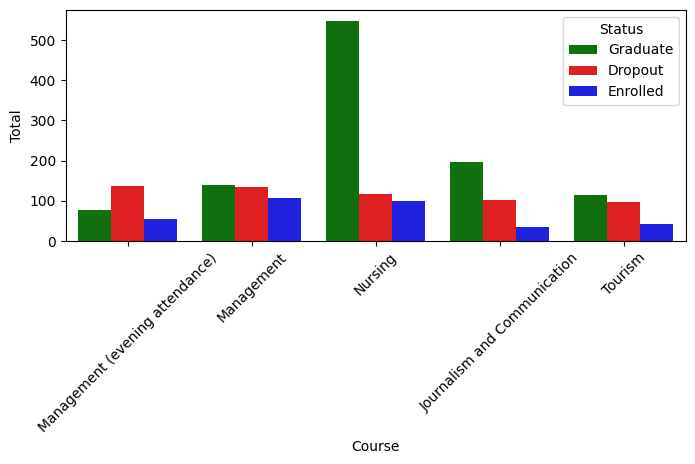

In [12]:
top_5_course = categorical_df[categorical_df["Status"] == "Dropout"]["Course"].value_counts().sort_values(ascending=False).head(5)
top_course_list = top_5_course.index.tolist()
top_5_course_df = categorical_df[categorical_df["Course"].isin(top_course_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Course', hue='Status', data=top_5_course_df, order=top_course_list, palette=color_dict)
plt.title('')
plt.xlabel('Course')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- Mahasiswa jurusan Manajemen menunjukkan tingkat kelulusan yang rendah, dengan sebagian besar mahasiswa memilih untuk dropout dari program tersebut. Tingkat dropout yang tinggi pada jurusan Manajemen mengindikasikan perlunya evaluasi terhadap program atau sistem pendukung akademik untuk meningkatkan tingkat kelulusan.

- Jurusan Keperawatan menempati posisi kedua dengan tingkat dropout tertinggi. Namun, proporsi ini tergolong kecil jika dibandingkan dengan jumlah mahasiswa yang berhasil lulus, yang melebihi 500 orang. menunjukkan daya tarik atau efisiensi program yang baik dibandingkan dengan dropout-nya.

- Jumlah mahasiswa yang dropout dari jurusan Keperawatan, Jurnalistik & Komunikasi, serta Pariwisata mencapai sekitar 100 orang di masing-masing jurusan.




##### **Marital Status**

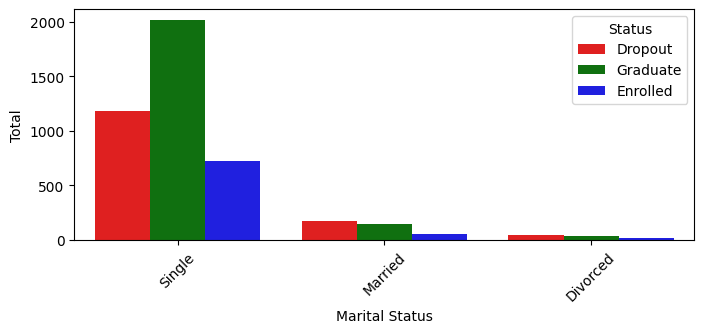

In [13]:
top_5_Marital = categorical_df[categorical_df["Status"] == "Dropout"]["Marital_status"].value_counts().sort_values(ascending=False).head(3)
top_Marital_list = top_5_Marital.index.tolist()
top_5_Marital_df = categorical_df[categorical_df["Marital_status"].isin(top_Marital_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Marital_status', hue='Status', data=top_5_Marital_df, order=top_Marital_list, palette=color_dict)
plt.title('')
plt.xlabel('Marital Status')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- Mahasiswa dengan status pernikahan single mendominasi populasi, hampir mencapai 4000 orang. Namun, sekitar 40% dari mereka mengalami dropout, menunjukkan tantangan besar dalam mempertahankan kelanjutan studi di kelompok ini.
- Mahasiswa yang menikah atau bercerai jumlahnya relatif sangat sedikit dibandingkan dengan mahasiswa single. Namun, proporsi dropout pada kelompok ini justru lebih tinggi dibandingkan yang lulus, mencerminkan tekanan atau kendala tambahan yang mungkin mereka alami selama studi.

##### **Previous Qualification**

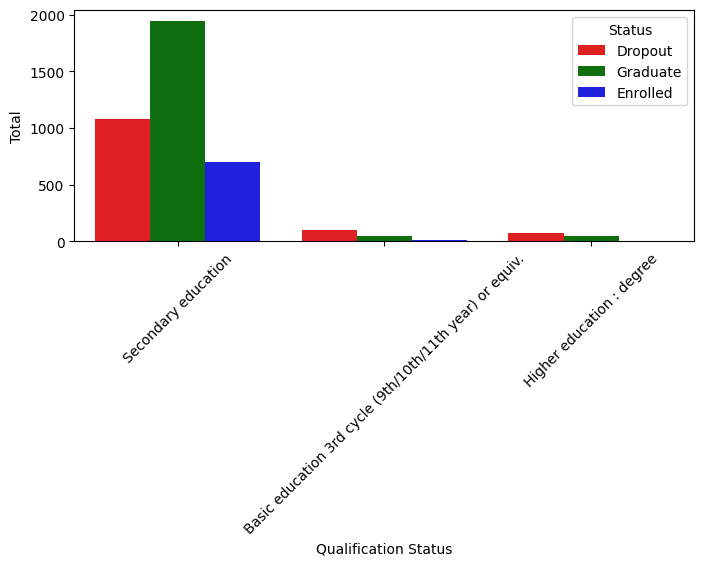

In [14]:
top_5_Qualification = categorical_df[categorical_df["Status"] == "Dropout"]["Previous_qualification"].value_counts().sort_values(ascending=False).head(3)
top_Qualification_list = top_5_Qualification.index.tolist()
top_5_Qualification_df = categorical_df[categorical_df["Previous_qualification"].isin(top_Qualification_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Previous_qualification', hue='Status', data=top_5_Qualification_df, order=top_Qualification_list, palette=color_dict)
plt.title('')
plt.xlabel('Qualification Status')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- Mahasiswa dengan status kualifikasi sebelumnya "Secondary Education" mendominasi populasi, hampir mencapai 4000 orang. Namun, sekitar 40% dari mereka mengalami dropout, menunjukkan tantangan besar dalam mempertahankan kelanjutan studi di kelompok ini.
- Mahasiswa yang berasal dari basic education dan degree jumlahnya relatif sangat sedikit dibandingkan dengan mahasiswa single. Namun, proporsi dropout pada kelompok ini justru lebih tinggi dibandingkan yang lulus, mencerminkan tekanan atau kendala tambahan yang mungkin mereka alami selama studi.

##### **Attendance**

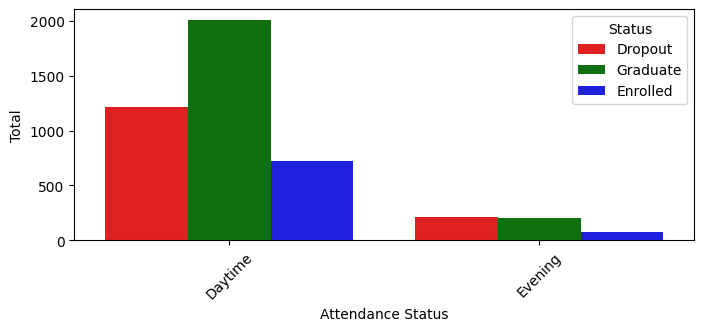

In [15]:
top_5_attendance = categorical_df[categorical_df["Status"] == "Dropout"]["Daytime_evening_attendance"].value_counts().sort_values(ascending=False).head(3)
top_attendance_list = top_5_attendance.index.tolist()
top_5_attendance_df = categorical_df[categorical_df["Daytime_evening_attendance"].isin(top_attendance_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Daytime_evening_attendance', hue='Status', data=top_5_attendance_df, order=top_attendance_list, palette=color_dict)
plt.title('')
plt.xlabel('Attendance Status')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- Mahasiswa yang mengikuti kelas daytime merupakan mayoritas, dengan jumlah mencapai sekitar 4000 orang. Namun, 50% dari mereka mengalami dropout, menunjukkan perlunya evaluasi program untuk meningkatkan retensi mahasiswa di kelas ini.

- Mahasiswa kelas malam memiliki tingkat dropout yang lebih besar dibandingkan jumlah mahasiswa yang berhasil lulus, mengindikasikan adanya tantangan unik, seperti waktu belajar yang mungkin kurang ideal atau tekanan akademik tambahan.

##### **Gender**

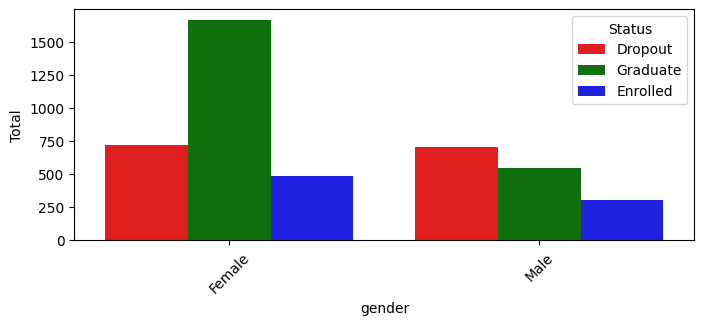

In [16]:
top_5_gender = categorical_df[categorical_df["Status"] == "Dropout"]["Gender"].value_counts().sort_values(ascending=False).head(3)
top_gender_list = top_5_gender.index.tolist()
top_5_gender_df = categorical_df[categorical_df["Gender"].isin(top_gender_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Gender', hue='Status', data=top_5_gender_df, order=top_gender_list, palette=color_dict)
plt.title('')
plt.xlabel('gender')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- Sebagian besar mahasiswa di kampus ini adalah perempuan, namun hampir 40% dari mereka mengalami dropout, menunjukkan perlunya perhatian terhadap faktor-faktor yang memengaruhi keberlanjutan studi mereka.

- Mahasiswa laki-laki hanya sekitar sepertiga dari jumlah mahasiswa perempuan, namun jumlah dropout mereka lebih besar, mengindikasikan tingkat ketidakberlanjutan studi yang lebih serius di kelompok ini.

###### **Parent Occupations**

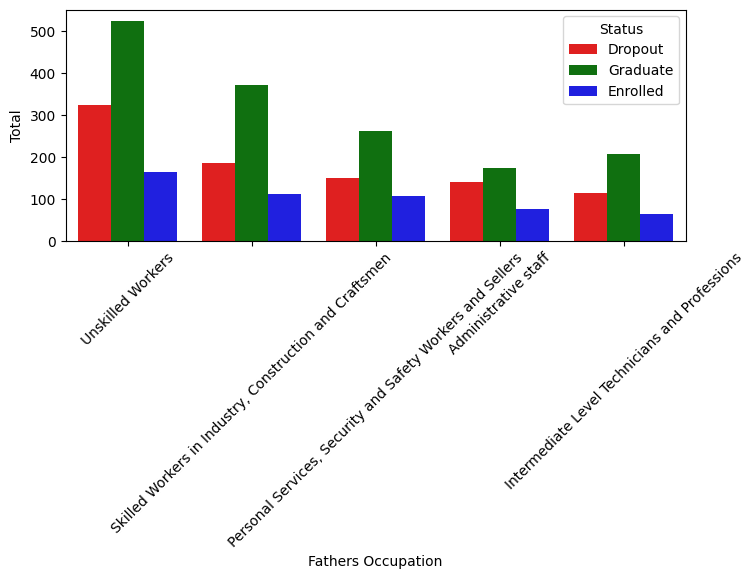

In [17]:
top_5_occ = categorical_df[categorical_df["Status"] == "Dropout"]["Fathers_occupation"].value_counts().sort_values(ascending=False).head(5)
top_gender_list = top_5_occ.index.tolist()
top_5_occ_df = categorical_df[categorical_df["Fathers_occupation"].isin(top_gender_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Fathers_occupation', hue='Status', data=top_5_occ_df, order=top_gender_list, palette=color_dict)
plt.title('')
plt.xlabel('Fathers Occupation')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

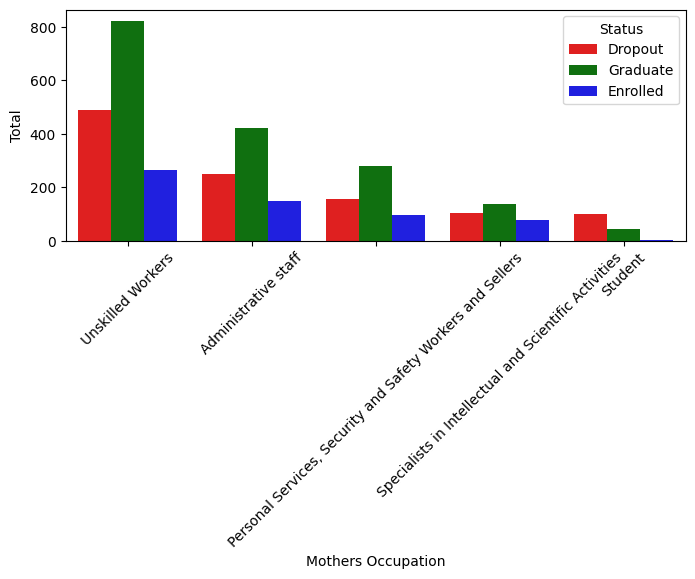

In [18]:
top_5_occ = categorical_df[categorical_df["Status"] == "Dropout"]["Mothers_occupation"].value_counts().sort_values(ascending=False).head(5)
top_gender_list = top_5_occ.index.tolist()
top_5_occ_df = categorical_df[categorical_df["Mothers_occupation"].isin(top_gender_list)]

color_dict = {
    'Graduate': 'green',
    'Enrolled': 'blue',
    'Dropout': 'red'
}

plt.figure(figsize=(8, 3))
sns.countplot(x='Mothers_occupation', hue='Status', data=top_5_occ_df, order=top_gender_list, palette=color_dict)
plt.title('')
plt.xlabel('Mothers Occupation')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- Mahasiswa yang berasal dari keluarga dengan orang tua yang tidak memiliki keahlian khusus atau bekerja sebagai buruh kasar cenderung memiliki tingkat dropout yang lebih tinggi dibandingkan dengan mahasiswa dari latar belakang keluarga lainnya.

- Faktor latar belakang sosial-ekonomi orang tua berpengaruh signifikan terhadap keberlanjutan studi mahasiswa. Keterbatasan dukungan finansial atau pendidikan dari orang tua mungkin menjadi penyebab utama tingginya tingkat dropout. Program bantuan, seperti beasiswa, bimbingan akademik, atau konseling, dapat menjadi solusi untuk mendukung mahasiswa dari kelompok ini.

##### **Doughnut Chart**

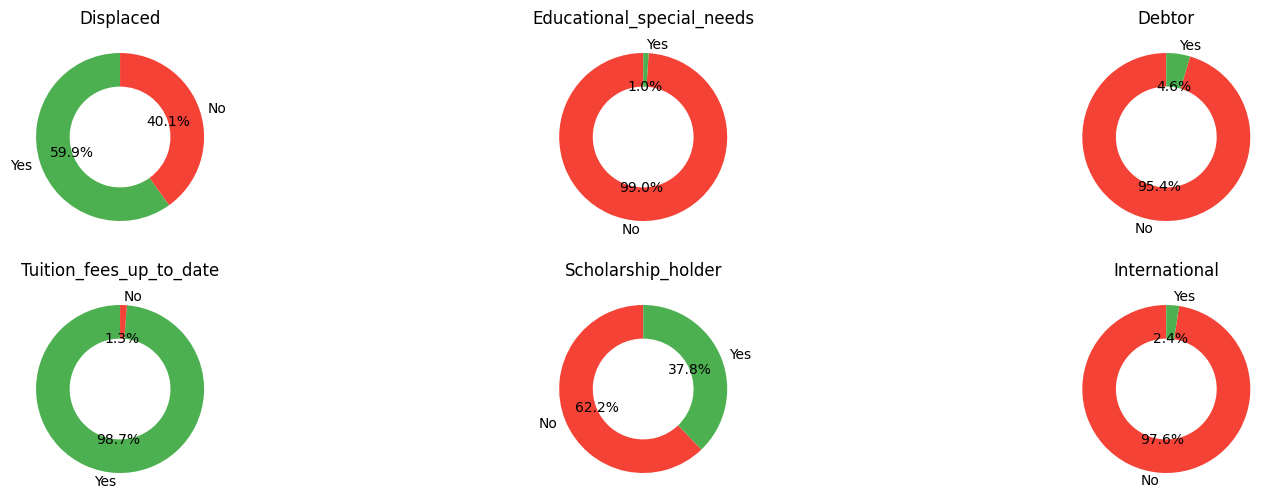

In [19]:
list_columns_doughnut = [
    "Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date",
    "Scholarship_holder", "International"
]

color_mapping = { "Yes": "#4CAF50", "No": "#F44336"}

fig, axes = plt.subplots(2, 3, figsize=(18, 6))  # Adjust to 2 rows, 3 columns
fig.subplots_adjust(wspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each category and corresponding axes
for i, col in enumerate(list_columns_doughnut):
  counts = categorical_df[categorical_df["Status"] == "Graduate"][col].value_counts()
  colors = [color_mapping[label] for label in counts.index]

  axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%',
              startangle=90, wedgeprops={'width': 0.4}, colors=colors)
  axes[i].set_title(col)

plt.show()

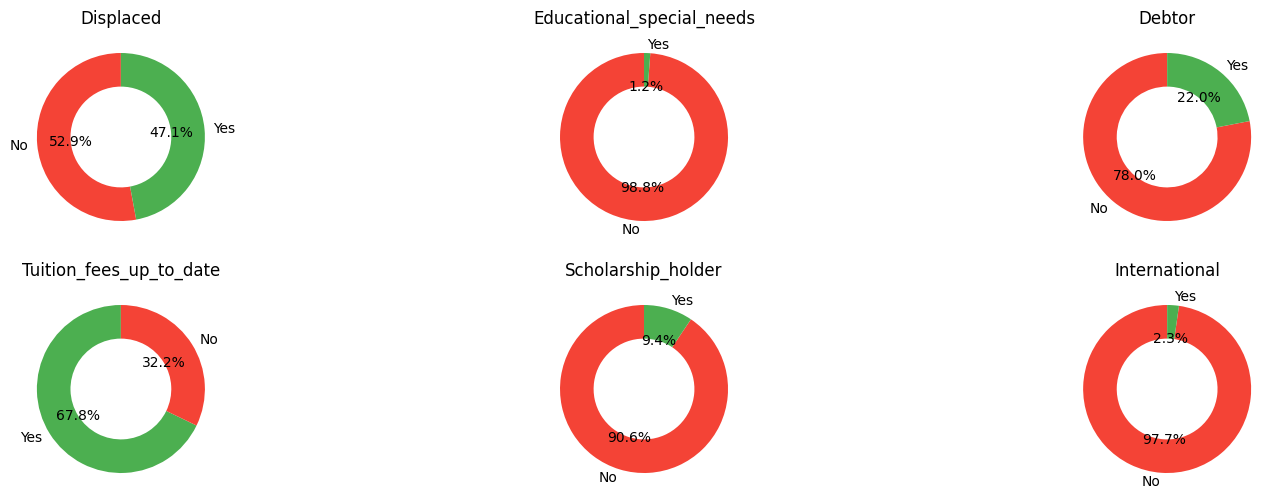

In [20]:
list_columns_doughnut = [
    "Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date",
    "Scholarship_holder", "International"
]

color_mapping = { "Yes": "#4CAF50", "No": "#F44336"}

fig, axes = plt.subplots(2, 3, figsize=(18, 6))  # Adjust to 2 rows, 3 columns
fig.subplots_adjust(wspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each category and corresponding axes
for i, col in enumerate(list_columns_doughnut):
  counts = categorical_df[categorical_df["Status"] == "Dropout"][col].value_counts()
  colors = [color_mapping[label] for label in counts.index]

  axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%',
              startangle=90, wedgeprops={'width': 0.4}, colors=colors)
  axes[i].set_title(col)

plt.show()

- Berdasarkan donut chart, beberapa variabel yang memiliki pengaruh signifikan terhadap tingkat dropout adalah debtor, tuition fees up to date, dan scholarship.

- Mahasiswa dengan status debtor mungkin menghadapi tekanan finansial yang membuat mereka sulit untuk melanjutkan studi. Ketidakmampuan membayar biaya kuliah tepat waktu (tuition fees not up to date) kemungkinan besar memperburuk situasi, yang pada akhirnya meningkatkan risiko dropout.

- Beasiswa memberikan dukungan finansial yang signifikan bagi mahasiswa, memungkinkan mereka untuk fokus pada studi tanpa beban ekonomi yang besar. Ini menjelaskan mengapa mahasiswa penerima beasiswa memiliki tingkat kelulusan yang lebih tinggi. Program beasiswa tidak hanya meringankan beban biaya kuliah tetapi juga berfungsi sebagai motivasi akademik.

- Untuk mengurangi tingkat dropout, kampus dapat memperluas program beasiswa dan memberikan solusi keuangan kepada mahasiswa dengan status debtor, seperti jadwal pembayaran fleksibel atau konseling keuangan.

## **Data Preparation / Preprocessing**

### **Feature Selection**

In [21]:
column_selected = [
    'Marital_status', 'Course', 'Previous_qualification', 'Nacionality', 'Mothers_occupation', 'Fathers_occupation',
    'Daytime_evening_attendance', 'Gender', 'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Application_order', 'Status'
]

df_used = raw_df[column_selected]
df_used[df_used["Status"] == 'Enrolled']

,Marital_status,Course,Previous_qualification,Nacionality,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Gender,Debtor,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Application_order,Status
16,1,9238,1,1,5,8,1,0,0,1,0,6,1,12.000000,6,2,11.000000,1,Enrolled
19,1,9853,1,1,7,7,1,0,0,1,0,7,6,11.666667,7,6,13.500000,1,Enrolled
21,1,9556,1,1,4,7,1,0,0,1,0,7,7,11.437500,8,8,11.425000,4,Enrolled
25,1,9238,1,1,9,9,1,0,1,1,1,6,5,11.600000,6,4,11.000000,1,Enrolled
27,1,9085,1,1,3,3,1,0,0,1,0,5,5,12.666667,5,4,13.000000,1,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1,9853,1,1,3,8,1,0,0,1,0,6,5,12.600000,6,3,11.666667,4,Enrolled
4402,1,9853,1,1,3,9,1,1,0,1,0,6,5,12.600000,6,6,13.000000,2,Enrolled
4406,1,9070,1,1,5,7,1,1,0,1,0,6,4,12.000000,6,2,11.333333,1,Enrolled
4412,1,9070,1,1,7,8,1,1,0,1,1,6,4,13.000000,6,5,12.200000,1,Enrolled


1. `Marital_status`: Status pernikahan dapat memengaruhi keseimbangan kehidupan pribadi dan akademik mahasiswa, yang berpotensi mempengaruhi dropout.

2. `Course`: Jurusan yang dipilih mempengaruhi tingkat kesulitan dan beban akademik, berhubungan dengan kemungkinan dropout.

3. `Previous_qualification`: Latar belakang pendidikan sebelumnya dapat menunjukkan kesiapan akademik dan mempengaruhi keberhasilan studi.

4. `Nacionality`: Kewarganegaraan memengaruhi tantangan seperti adaptasi budaya dan bahasa, yang dapat berdampak pada dropout.

5. `Mothers_occupation`: Pekerjaan ibu menggambarkan latar belakang ekonomi keluarga, yang mempengaruhi dukungan keuangan dan emosional mahasiswa.

6. `Fathers_occupation`: Pekerjaan ayah mempengaruhi stabilitas ekonomi keluarga, yang dapat mempengaruhi kelangsungan studi mahasiswa.

7. `Daytime_evening_attendance`: Pilihan jadwal kuliah dapat memengaruhi kemampuan mahasiswa dalam mengelola waktu, yang berpotensi meningkatkan risiko dropout.

8. `Gender`: Jenis kelamin dapat memengaruhi cara mahasiswa mengatasi tantangan akademik dan sosial di kampus, yang berdampak pada kelulusan.

9. `Debtor`: Status sebagai debtor menunjukkan masalah finansial, meningkatkan risiko dropout karena kesulitan pembayaran.

10. `Tuition_fees_up_to_date`: Pembayaran biaya kuliah tepat waktu mencerminkan komitmen finansial, yang berhubungan dengan kelangsungan studi.

11. `Scholarship_holder`: Penerima beasiswa memiliki dukungan finansial, mengurangi risiko dropout dan meningkatkan peluang kelulusan.

12. `Curricular_units_1st_sem_enrolled`: Jumlah mata kuliah yang diambil pada semester pertama mencerminkan komitmen terhadap studi dan pengaruhnya pada kelulusan.

13. `Curricular_units_1st_sem_approved`: Mata kuliah yang disetujui menunjukkan kinerja akademik, yang berhubungan dengan keberhasilan atau kegagalan studi.

14. `Curricular_units_1st_sem_grade`: Nilai semester pertama menunjukkan kemampuan akademik, yang dapat mengindikasikan risiko dropout.

15. `Curricular_units_2nd_sem_enrolled`: Mata kuliah yang diambil pada semester kedua menunjukkan keterlibatan dan motivasi mahasiswa dalam studi mereka.

16. `Curricular_units_2nd_sem_approved`: Mata kuliah yang disetujui pada semester kedua menunjukkan kemajuan akademik, yang memengaruhi kemungkinan lulus atau dropout.

17. `Curricular_units_2nd_sem_grade`: Nilai semester kedua mencerminkan kemampuan akademik dan mempengaruhi kelangsungan studi.

18. `Application_order`: Urutan aplikasi menunjukkan motivasi mahasiswa dalam diterima di program studi, yang mempengaruhi komitmen mereka terhadap studi.

19. `Status`: Status mahasiswa (lulus, dropout) adalah variabel target untuk memprediksi hasil studi berdasarkan faktor-faktor lainnya.

### **Label Encoding**

In [22]:
# Menerapkan label encoding pada kolom yang ditentukan
encoded_df = df_used.copy()  # Membuat salinan untuk menghindari perubahan pada DataFrame asli
encoded_df["Status"] = encoded_df["Status"].map({"Enrolled": np.nan, "Graduate": 1, "Dropout": 2})

encoded_df[encoded_df["Status"].isna()]

,Marital_status,Course,Previous_qualification,Nacionality,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Gender,Debtor,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Application_order,Status
16,1,9238,1,1,5,8,1,0,0,1,0,6,1,12.000000,6,2,11.000000,1,NaN
19,1,9853,1,1,7,7,1,0,0,1,0,7,6,11.666667,7,6,13.500000,1,NaN
21,1,9556,1,1,4,7,1,0,0,1,0,7,7,11.437500,8,8,11.425000,4,NaN
25,1,9238,1,1,9,9,1,0,1,1,1,6,5,11.600000,6,4,11.000000,1,NaN
27,1,9085,1,1,3,3,1,0,0,1,0,5,5,12.666667,5,4,13.000000,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1,9853,1,1,3,8,1,0,0,1,0,6,5,12.600000,6,3,11.666667,4,NaN
4402,1,9853,1,1,3,9,1,1,0,1,0,6,5,12.600000,6,6,13.000000,2,NaN
4406,1,9070,1,1,5,7,1,1,0,1,0,6,4,12.000000,6,2,11.333333,1,NaN
4412,1,9070,1,1,7,8,1,1,0,1,1,6,4,13.000000,6,5,12.200000,1,NaN


Kolom Status perlu di-label encoding karena mereka berisi data kategorikal yang perlu dikonversi menjadi format numerik agar dapat digunakan dalam model machine learning.


### **Feature Scaling**

In [23]:
preprocessor = MinMaxScaler(feature_range=(0, 1))
preprocessor.fit(encoded_df)
joblib.dump(preprocessor, 'feature_scaler.pkl')

scaled_data = preprocessor.transform(encoded_df)
scaled_df = pd.DataFrame(scaled_data, columns=encoded_df.columns)

scaled_df

,Marital_status,Course,Previous_qualification,Nacionality,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Gender,Debtor,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Application_order,Status
0,0.0,0.013858,0.0,0.000000,0.025773,0.046154,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.555556,1.0
1,0.0,0.925989,0.0,0.000000,0.015464,0.015385,1.0,1.0,0.0,0.0,0.0,0.230769,0.230769,0.741722,0.260870,0.30,0.735897,0.111111,0.0
2,0.0,0.907512,0.0,0.000000,0.046392,0.046154,1.0,1.0,0.0,0.0,0.0,0.230769,0.000000,0.000000,0.260870,0.00,0.000000,0.555556,1.0
3,0.0,0.978108,0.0,0.000000,0.025773,0.015385,1.0,0.0,0.0,1.0,0.0,0.230769,0.230769,0.711447,0.260870,0.25,0.667692,0.222222,0.0
4,0.2,0.801466,0.0,0.000000,0.046392,0.046154,0.0,0.0,0.0,1.0,0.0,0.230769,0.192308,0.653422,0.260870,0.30,0.700000,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.978108,0.0,0.000000,0.025773,0.020513,1.0,1.0,0.0,1.0,0.0,0.230769,0.192308,0.720530,0.260870,0.25,0.682051,0.666667,0.0
4420,0.0,0.978108,0.0,0.962963,0.046392,0.046154,1.0,0.0,1.0,0.0,0.0,0.230769,0.230769,0.635762,0.260870,0.10,0.592308,0.222222,1.0
4421,0.0,0.950693,0.0,0.000000,0.046392,0.046154,1.0,0.0,0.0,1.0,1.0,0.269231,0.269231,0.790066,0.347826,0.05,0.726923,0.111111,1.0
4422,0.0,0.915244,0.0,0.000000,0.036082,0.020513,1.0,0.0,0.0,1.0,1.0,0.192308,0.192308,0.731126,0.217391,0.25,0.646154,0.111111,0.0


- Algoritma machine learning sangat sensitif terhadap skala fitur.
- Data dengan skala yang berbeda-beda bisa menyebabkan model tidak memberikan hasil yang optimal.
- MinMaxScaler mengubah semua fitur ke dalam rentang yang sama (biasanya antara 0 dan 1), sehingga setiap fitur memiliki pengaruh yang setara dalam model.

### **Split Dataset**

In [24]:
data_label_df = scaled_df[~scaled_df["Status"].isna()]
data_unlabel_df = scaled_df[scaled_df["Status"].isna()]
data_unlabel_df.head()

,Marital_status,Course,Previous_qualification,Nacionality,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Gender,Debtor,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Application_order,Status
16,0.0,0.924382,0.0,0.0,0.025773,0.041026,1.0,0.0,0.0,1.0,0.0,0.230769,0.038462,0.635762,0.260870,0.1,0.592308,0.111111,NaN
19,0.0,0.986142,0.0,0.0,0.036082,0.035897,1.0,0.0,0.0,1.0,0.0,0.269231,0.230769,0.618102,0.304348,0.3,0.726923,0.111111,NaN
21,0.0,0.956317,0.0,0.0,0.020619,0.035897,1.0,0.0,0.0,1.0,0.0,0.269231,0.269231,0.605960,0.347826,0.4,0.615192,0.444444,NaN
25,0.0,0.924382,0.0,0.0,0.046392,0.046154,1.0,0.0,1.0,1.0,1.0,0.230769,0.192308,0.614570,0.260870,0.2,0.592308,0.111111,NaN
27,0.0,0.909018,0.0,0.0,0.015464,0.015385,1.0,0.0,0.0,1.0,0.0,0.192308,0.192308,0.671082,0.217391,0.2,0.700000,0.111111,NaN


In [25]:
# Memisahkan fitur (X) dan label target (y) dari DataFrame data_label_df
X = data_label_df.drop('Status', axis=1)  # Menghapus kolom 'Attrition' untuk mendapatkan fitur
y = data_label_df['Status']  # Mengambil kolom 'Attrition' sebagai label target

# Membagi dataset menjadi data latih (train) dan data uji (test)
# test_size=0.2 berarti 20% data digunakan untuk pengujian, sedangkan 80% untuk pelatihan
# random_state=42 digunakan untuk memastikan hasil pembagian data selalu sama setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah baris dan kolom pada masing-masing data latih dan uji
print("X_train shape:", X_train.shape)  # Ukuran data fitur untuk pelatihan
print("y_train shape:", y_train.shape)  # Ukuran label target untuk pelatihan
print("X_test shape:", X_test.shape)    # Ukuran data fitur untuk pengujian
print("y_test shape:", y_test.shape)    # Ukuran label target untuk pengujian

X_train shape: (2904, 18)
y_train shape: (2904,)
X_test shape: (726, 18)
y_test shape: (726,)


- mahasiswa yang masih `Enrolled` akan digunakan untuk dilakukan prediksi nantinya apakah mahasiswa tersebut akan lulus atau dropout
- Lalu untuk data yang memiliki status `graduated` dan `dropout` akan digunakan sebagai data latih dan uji

## **Modeling**

In [26]:
# Mendefinisikan grid parameter untuk tuning hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Melatih grid search pada data latih
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan skor akurasi yang sesuai
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Mengevaluasi model terbaik pada data uji
best_rf_classifier = grid_search.best_estimator_
accuracy = best_rf_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.9053017983263102
Test Accuracy: 0.8980716253443526


In [27]:
filename = 'model.sav'
joblib.dump(best_rf_classifier, filename)

['model.sav']

Best Hyperparameters: Model menggunakan hyperparameter yang optimal untuk menghasilkan performa terbaik, dengan nilai sebagai berikut:

- max_depth=20: Ini menunjukkan bahwa kedalaman maksimal pohon keputusan yang digunakan dalam model dibatasi pada 20. Ini menghindari overfitting, sehingga model lebih generalizable.
- min_samples_leaf=1: Setiap daun pohon harus memiliki setidaknya 1 sampel data. Ini membantu memastikan bahwa model tidak memecah data terlalu banyak, yang dapat menyebabkan model terlalu spesifik dan rentan terhadap noise.
- min_samples_split=5: Ini berarti bahwa pohon keputusan hanya akan melakukan pemecahan jika terdapat setidaknya 5 sampel dalam node. Ini juga bertujuan untuk menghindari overfitting.
- n_estimators=200: Model menggunakan 200 estimator (pohon keputusan) dalam ensemble. Ini memberi model kekuatan lebih untuk membuat keputusan yang lebih tepat dengan menggabungkan prediksi dari beberapa pohon.

## **Evaluation**

In [28]:
print(min(grid_search.cv_results_['mean_test_score']))
print(max(grid_search.cv_results_['mean_test_score']))

0.8966894177696005
0.9053017983263102


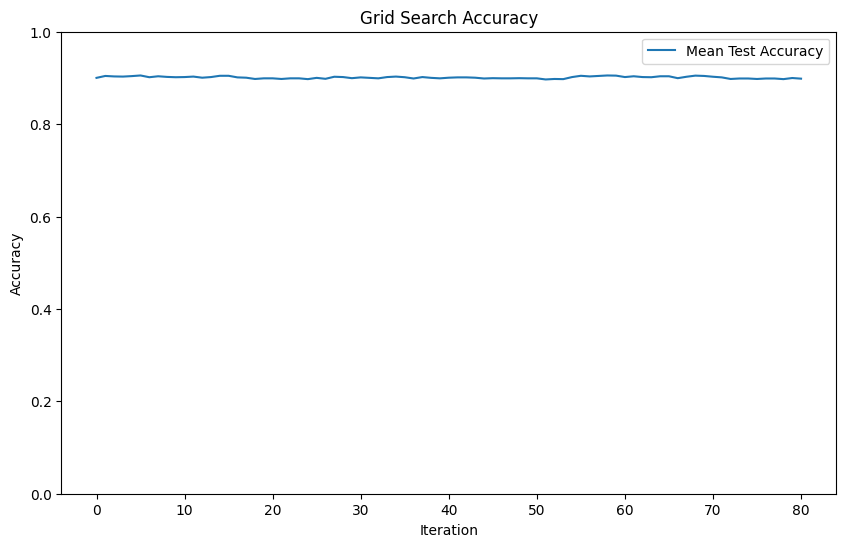

In [29]:
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['mean_test_score'], label='Mean Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Grid Search Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

- Nilai akurasi berkisar antara 0.8977 hingga 0.9067, yang menunjukkan bahwa model dapat menghasilkan akurasi yang cukup stabil. Nilai ini umumnya cukup baik untuk model klasifikasi.
- Tidak ada fluktuasi akurasi yang terlalu besar antar kombinasi hyperparameter. Akurasi relatif stabil, yang menunjukkan bahwa model tidak terlalu peka terhadap perubahan kecil dalam hyperparameter.

## **Result**

In [30]:
data_predict = data_unlabel_df.copy()
data_predict['Status'] = best_rf_classifier.predict(data_predict.drop('Status', axis=1))
data_predict['Status']

,Status
16,1.0
19,0.0
21,0.0
25,0.0
27,0.0
...,...
4397,1.0
4402,0.0
4406,1.0
4412,0.0


In [31]:
column_selected = [
    'Marital_status_cat', 'Course_cat', 'Previous_qualification_cat', 'Nacionality_cat',
    'Mothers_occupation_cat', 'Fathers_occupation_cat', 'Daytime_evening_attendance_cat',
    'Gender_cat', 'Debtor_cat', 'Tuition_fees_up_to_date_cat', 'Scholarship_holder_cat',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Application_order', 'Status'
]

all_data = raw_df.copy()[column_selected]
all_data["Enrolled"] = all_data["Status"].apply(lambda x : x == "Enrolled")

merged_data = pd.merge(all_data, data_predict[['Status']], left_index=True, right_index=True, how='left')
merged_data["Status"] = merged_data["Status_y"].map({0: "Graduate", 1: "Dropout", np.nan : ''}) + (merged_data["Status_x"].where(merged_data["Status_x"] != "Enrolled", ''))

for col in ["Status_x", "Status_y"]:
  merged_data.pop(col)

merged_data = merged_data.rename(columns={x + "_cat" : x for x in listCategorical})
merged_data[merged_data["Enrolled"]].head()

,Marital_status,Course,Previous_qualification,Nacionality,Mothers_occupation,Fathers_occupation,Daytime_evening_attendance,Gender,Debtor,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Application_order,Enrolled,Status
16,Single,Social Service,Secondary education,Portuguese,"Personal Services, Security and Safety Workers...",Installation and Machine Operators and Assembl...,Daytime,Female,No,Yes,No,6,1,12.000000,6,2,11.000,1,True,Dropout
19,Single,Basic Education,Secondary education,Portuguese,"Skilled Workers in Industry, Construction and ...","Skilled Workers in Industry, Construction and ...",Daytime,Female,No,Yes,No,7,6,11.666667,7,6,13.500,1,True,Graduate
21,Single,Oral Hygiene,Secondary education,Portuguese,Administrative staff,"Skilled Workers in Industry, Construction and ...",Daytime,Female,No,Yes,No,7,7,11.437500,8,8,11.425,4,True,Graduate
25,Single,Social Service,Secondary education,Portuguese,Unskilled Workers,Unskilled Workers,Daytime,Female,Yes,Yes,Yes,6,5,11.600000,6,4,11.000,1,True,Graduate
27,Single,Veterinary Nursing,Secondary education,Portuguese,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,Daytime,Female,No,Yes,No,5,5,12.666667,5,4,13.000,1,True,Graduate


In [32]:
merged_data.to_csv("clean_data.csv", index=False)